Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
file_path=r"F:\House Price Prediction Model\Bengaluru_House_Data.csv"
df1 = pd.read_csv(file_path)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape #number of rows,columns

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
for column in df1.columns:
    print(df1[column].value_counts()) #Calculates the frequency of each unique value in the column.
    print("*" * 20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
********************
siz

**Data Cleaning:**

In [6]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Dropping features that are not required to build our model

In [7]:
df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df2['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [9]:
df2['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [10]:
df3 = df2.copy()
bath_median = df3['bath'].median()
balcony_median = df3['balcony'].median()
df3['bath'] = df3['bath'].fillna(bath_median)
df3['balcony'] = df3['balcony'].fillna(balcony_median)
df3['location'] = df3['location'].fillna('Whitefield')
df3['size'] = df3['size'].fillna('2 BHK')
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
#feature engineering
df3['bhk'] = df3['size'].str.split().str.get(0).astype(int)
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)].head(10) #Selects rows from df3 where the total_sqft value is not a float.

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can be converted or dropped

In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [16]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3


In [17]:
#Feature Engineering:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [18]:
len(df5.location.unique())

1305

In [19]:
#If we use one hot encoding we have to keep 1305 columns which is too much and this is called dimentionality curse
#Dimentionality reduction:
df5.location = df5.location.apply(lambda x: x.strip()) #x.strip() removes leading and trailing whitespace (spaces, tabs, newlines) from each element x in the column.
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                              542
Sarjapur  Road                          399
Electronic City                         304
Kanakpura Road                          273
Thanisandra                             237
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1294, dtype: int64

**Dimensionality Reduction:**

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [20]:
len(location_stats[location_stats<=10])

1053

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                                10
Dairy Circle                            10
Nagappa Reddy Layout                    10
Naganathapura                           10
Sector 1 HSR Layout                     10
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1053, dtype: int64

In [22]:
len(df5.location.unique())

1294

In [23]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [24]:
df5[df5.bhk>20] #outliers

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1718,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.0
4684,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0,43,27500.0


**Outlier Removal Using Business Logic**

Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If we have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [25]:
#Outlier Detection:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [26]:
df5.shape

(13320, 8)

In [27]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12576, 8)

In [28]:
df6.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [29]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10301, 8)

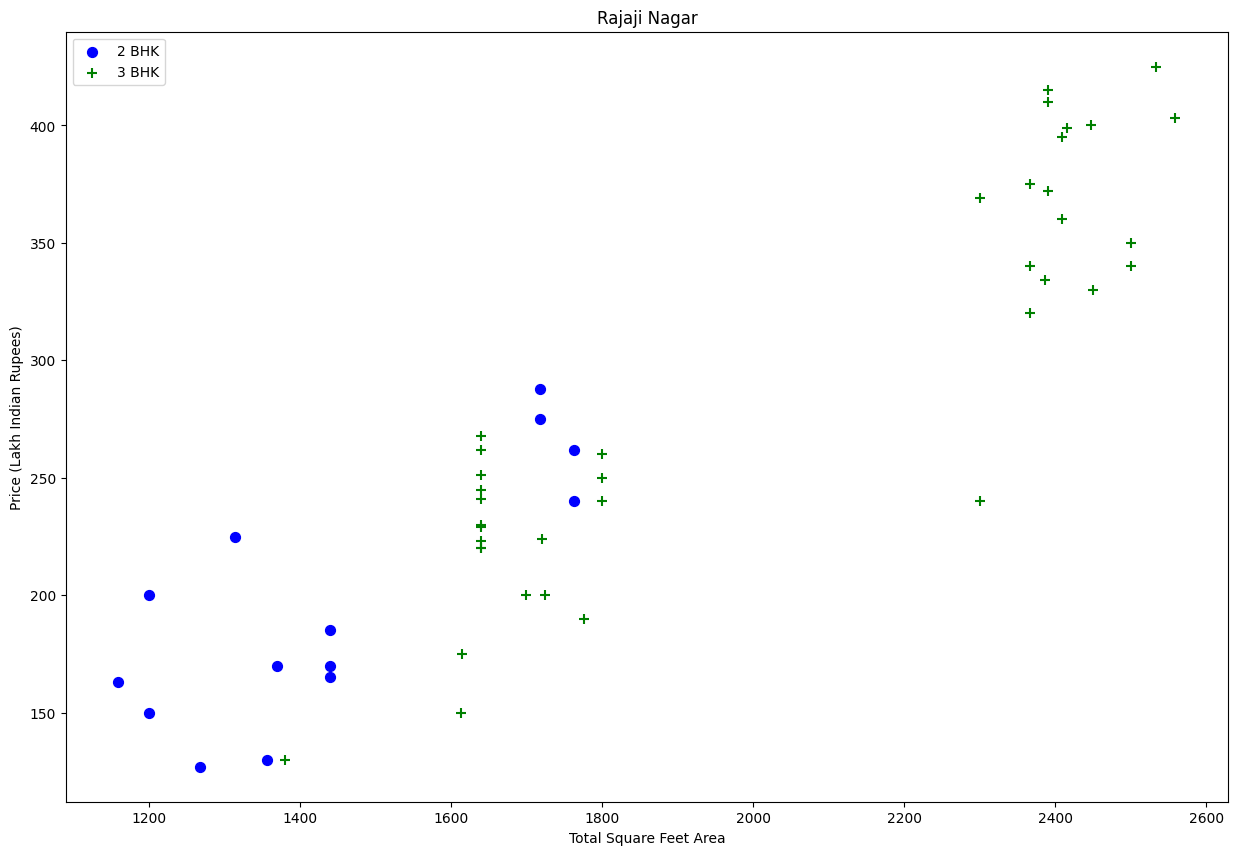

In [30]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show() 

plot_scatter_chart(df7, "Rajaji Nagar")

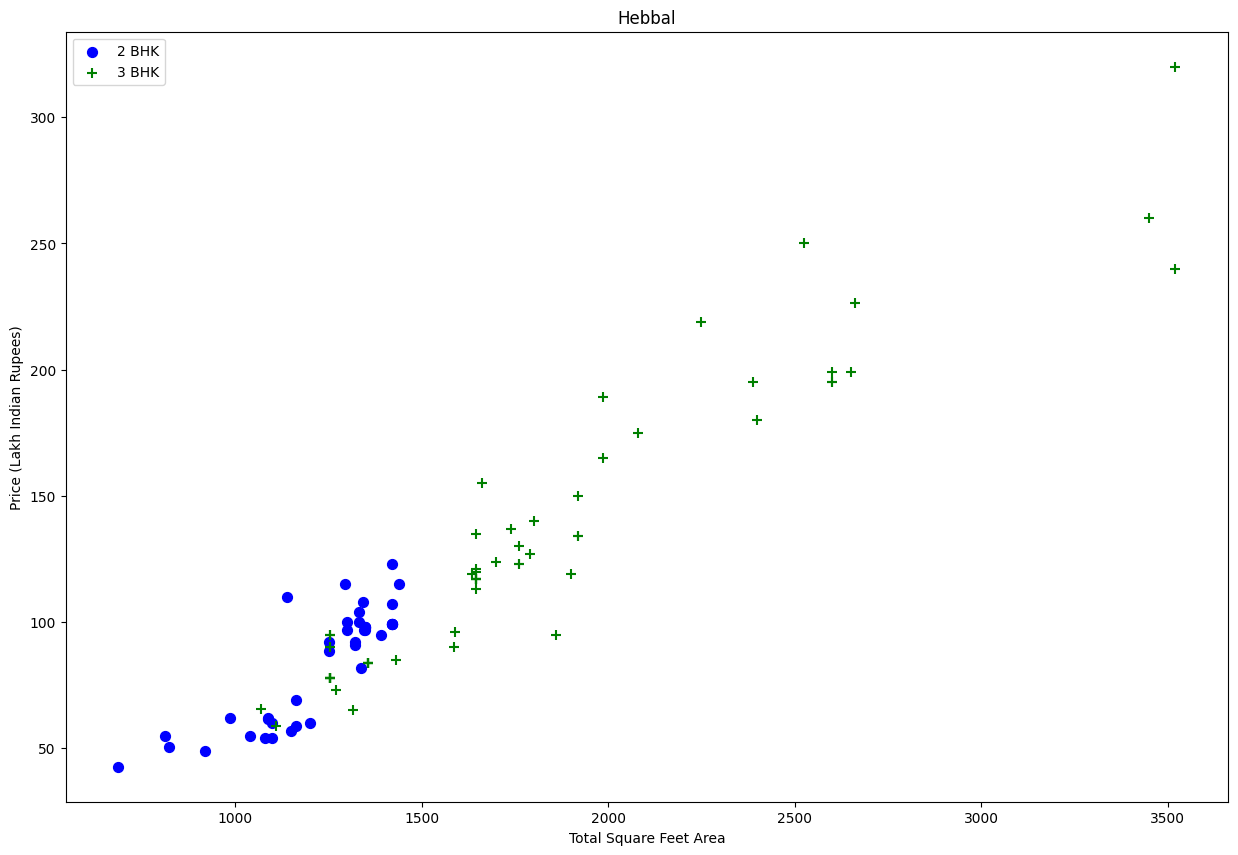

In [31]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7361, 8)

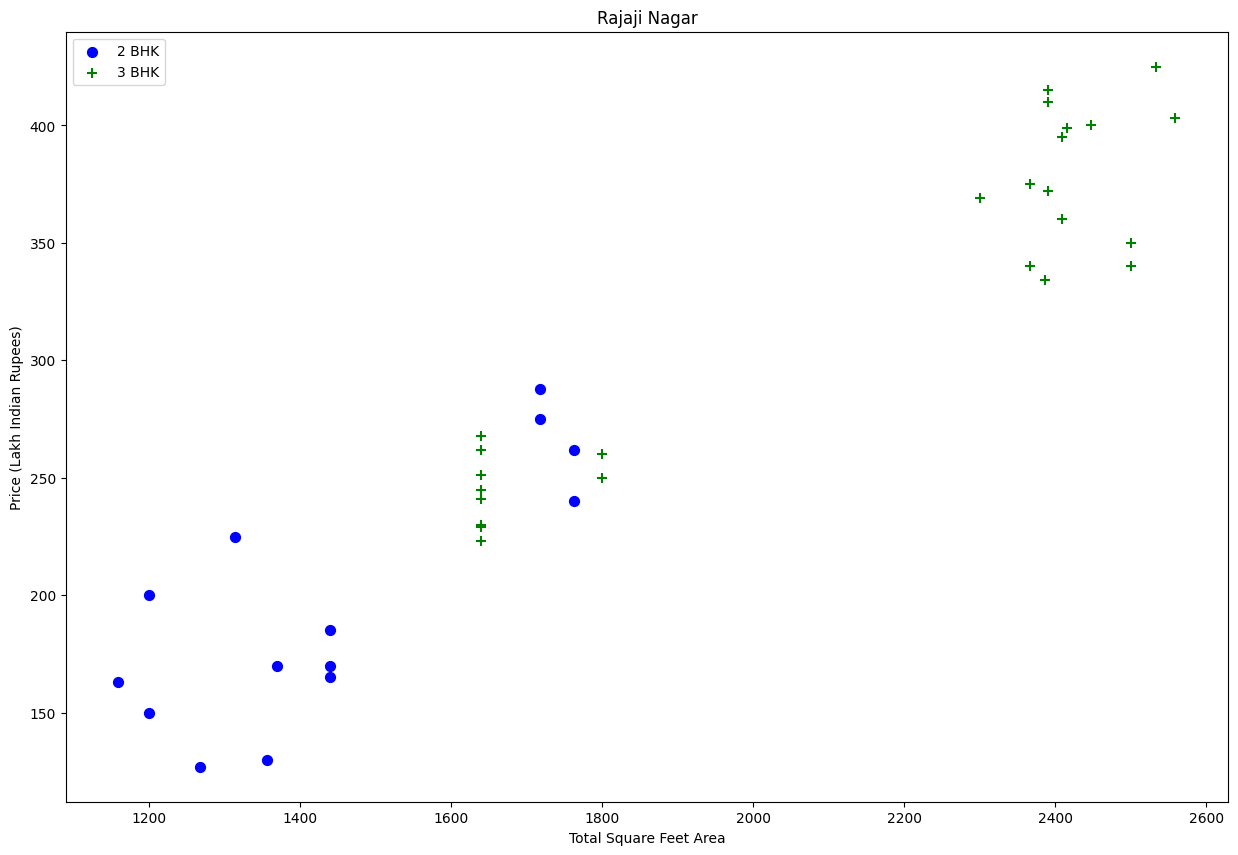

In [33]:
plot_scatter_chart(df8,"Rajaji Nagar")

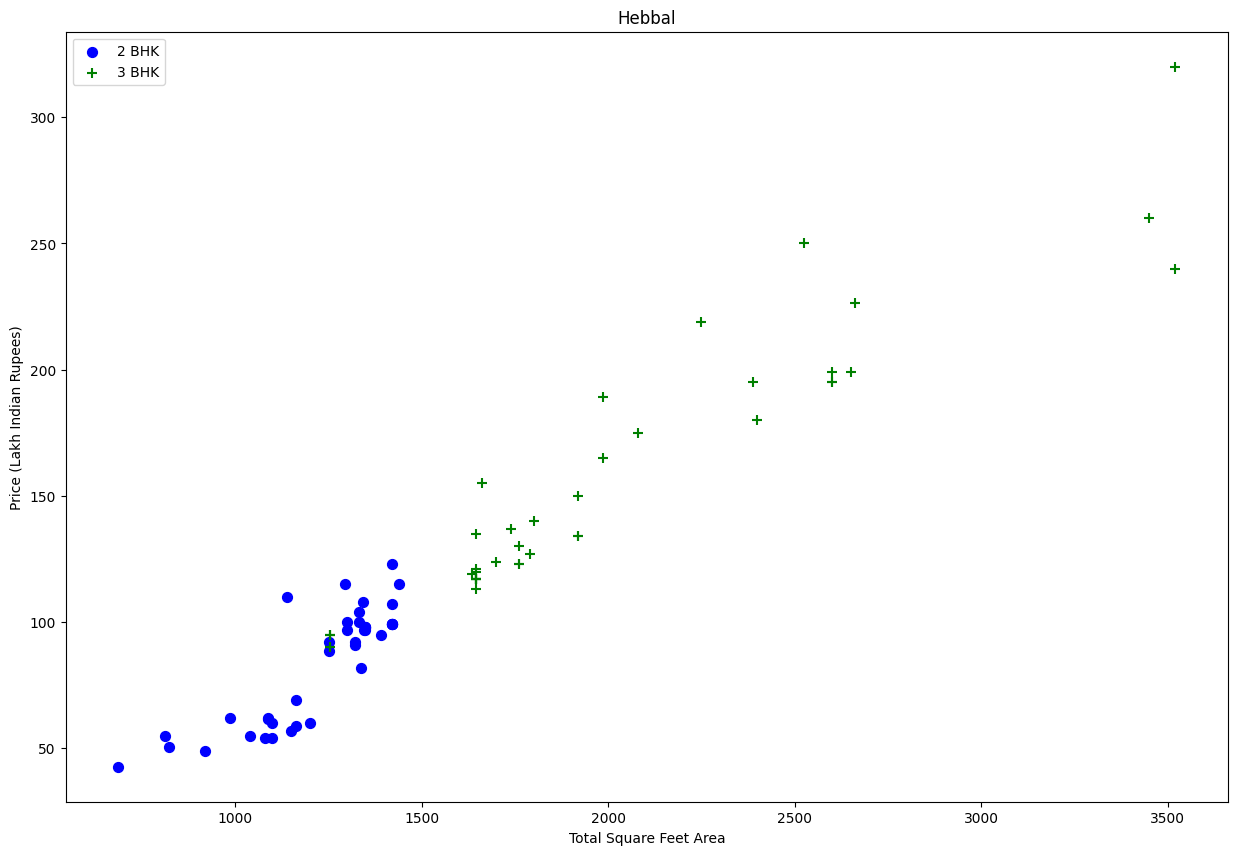

In [34]:
plot_scatter_chart(df8,"Hebbal")

In [35]:
df8.balcony.unique()

array([1., 2., 3., 0.])

In [36]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [37]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8468,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [38]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7282, 8)

In [39]:
df8[df8.balcony>df8.bhk+1]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft


Above looks good

In [40]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3) #price_per_sqft was used only for outlier detection

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


**One Hot Encoding For Location:**

In [41]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Building our model:**

In [44]:
df12.shape

(7282, 246)

In [45]:
df12.to_csv('cleaned_data.csv', index=False)

In [46]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
X.shape

(7282, 245)

In [48]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [52]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [53]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.8735499455116387, np.float64(32.17414418726326))

In [54]:
# Lasso
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test)
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8490143564297359, np.float64(35.15728427312608))

In [55]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test)
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.15944837972890202, np.float64(82.95253991380403))

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test)
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.8708764478059429, np.float64(32.51248956755348))

In [57]:
from xgboost import XGBRegressor

# Initialize properly
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test)
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse

(0.9010794757331962, np.float64(28.45710380280827))

In [58]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model     Score       RMSE
0       Linear Regression  0.873550  32.174144
1                   Lasso  0.849014  35.157284
2  Support Vector Machine  0.159448  82.952540
3           Random Forest  0.870876  32.512490
4                 XGBoost  0.901079  28.457104


In [59]:
from sklearn.model_selection import KFold,cross_val_score
cvs_lr = cross_val_score(lr, X_train,y_train, cv = 10)
cvs_lr, cvs_lr.mean()

(array([0.87195974, 0.82553016, 0.89126854, 0.82277588, 0.75998098,
        0.86187465, 0.78108363, 0.8367073 , 0.85400452, 0.8467824 ]),
 np.float64(0.8351967807273837))

In [60]:
cvs_xg = cross_val_score(xgb_reg, X_train,y_train, cv = 10)
cvs_xg, cvs_xg.mean()

(array([0.87490522, 0.8582377 , 0.84518419, 0.84934847, 0.82832013,
        0.84338543, 0.62887405, 0.82649817, 0.89689837, 0.85062206]),
 np.float64(0.830227377991252))

**HyperParameter Tuning**

In [63]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBoost model
xgb_reg1 = xgb.XGBRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and print them
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_xgb_reg1 = xgb.XGBRegressor(**best_params)
best_xgb_reg1.fit(X_train, y_train)

# Evaluate the model
train_r2 = best_xgb_reg1.score(X_train, y_train)
test_r2 = best_xgb_reg1.score(X_test, y_test)
print(f"Training R² score: {train_r2}")
print(f"Testing R² score: {test_r2}")

# Cross-validation
cvs1 = cross_val_score(best_xgb_reg1, X_train, y_train, cv=10)
print("Cross-validation scores: ", cvs1)
print("Mean cross-validation score: ", cvs1.mean())

#RMSE
xgb_reg_1rmse = rmse(y_test, best_xgb_reg1.predict(X_test))
print(f"RMSE: {xgb_reg_1rmse}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Training R² score: 0.9527020838120632
Testing R² score: 0.9081520595408017
Cross-validation scores:  [0.89080014 0.86391591 0.85579905 0.85836834 0.84323819 0.84848315
 0.6267389  0.82918106 0.90662325 0.85721677]
Mean cross-validation score:  0.8380364760685695
RMSE: 27.42093154354249


In [64]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

xgb_reg2 = xgb.XGBRegressor()
grid_search1 = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search1.fit(X_train, y_train)
best_params1 = grid_search1.best_params_
print("Best parameters found: ", best_params1)
best_xgb_reg2 = xgb.XGBRegressor(**best_params1)
best_xgb_reg2.fit(X_train, y_train)
train_r2 = best_xgb_reg2.score(X_train, y_train)
test_r2 = best_xgb_reg2.score(X_test, y_test)
print(f"Training R² score: {train_r2}")
print(f"Testing R² score: {test_r2}")
cvs2 = cross_val_score(best_xgb_reg2, X_train, y_train, cv=10)
print("Cross-validation scores: ", cvs2)
print("Mean cross-validation score: ", cvs2.mean())
xgb_reg_2rmse = rmse(y_test, best_xgb_reg2.predict(X_test))
print(f"RMSE: {xgb_reg_2rmse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Training R² score: 0.9374711199099682
Testing R² score: 0.9120284439781281
Cross-validation scores:  [0.88745887 0.85747464 0.86825495 0.85690717 0.83835408 0.85749616
 0.64222996 0.83522977 0.89994828 0.86667911]
Mean cross-validation score:  0.841003296847933
RMSE: 26.836052339151962


In [65]:
from sklearn.ensemble import StackingRegressor
# Create a stacking ensemble with XGBoost and linear regression (or other models)
base_learners = [
    ('xgb', xgb.XGBRegressor(**best_params1)),
    ('lr', LinearRegression())
]
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Evaluate ensemble model performance
train_r2_stacking = stacking_model.score(X_train, y_train)
test_r2_stacking = stacking_model.score(X_test, y_test)
print(f"Stacking Training R² score: {train_r2_stacking}")
print(f"Stacking Testing R² score: {test_r2_stacking}")
cvs4 = cross_val_score(stacking_model, X_train, y_train, cv=10)
print("Cross-validation scores: ", cvs4)
print("Mean cross-validation score: ", cvs4.mean())

stackingRmse = rmse(y_test, stacking_model.predict(X_test))
print(f"RMSE: {stackingRmse}")

Stacking Training R² score: 0.9151303156904128
Stacking Testing R² score: 0.914103397519335
Cross-validation scores:  [0.89444304 0.86748317 0.8995729  0.85306853 0.81394299 0.8887323
 0.71371043 0.85146668 0.89287639 0.87231081]
Mean cross-validation score:  0.8547607233938089
RMSE: 26.517677618035044


Generalisation is more important than training performance so we did'nt choose the previous model

Cross-validation scores: The cross-validation scores has a mean of 0.848, showing that the model does not perform drastically worse on different subsets of the data
The training R² score of 0.915 is quite close to the testing R² score of 0.914. This suggests that the model is not overfitting (where training performance would be much higher than testing performance) or underfitting (where both would be similarly low). Instead, the model is achieving good performance on both the training and testing datasets.

Based on above results we can say that Stacked Model gives the best score. Hence we will use that.

**Test the model for few properties**

In [66]:
def predict_price(location, total_sqft, bath, balcony, bhk):
    import pandas as pd  # Ensure pandas is imported

    # Create a DataFrame with one row containing all features
    input_data = pd.DataFrame([[total_sqft, bath, balcony, bhk] + [0] * (len(X.columns) - 4)],
                              columns=X.columns)

    # Set the location dummy to 1 if it exists in our columns
    if location in X.columns:
        input_data[location] = 1

    # Scale the input data using the same scaler used for training data
    input_data_scaled = sc.transform(input_data)

    # Predict the price using the trained stacking model
    return stacking_model.predict(input_data_scaled)[0]

# Test the prediction function again
test_locations = ['1st Phase JP Nagar', 'Indira Nagar', 'other']
for loc in test_locations:
    price = predict_price(loc, 1000, 2, 2, 2)
    print(f"Location: {loc}")
    print(f"Predicted price: {price:.2f} lakhs for 1000 sqft, 2 bath, 2 balcony, 2 BHK")

Location: 1st Phase JP Nagar
Predicted price: 76.72 lakhs for 1000 sqft, 2 bath, 2 balcony, 2 BHK
Location: Indira Nagar
Predicted price: 140.23 lakhs for 1000 sqft, 2 bath, 2 balcony, 2 BHK
Location: other
Predicted price: 66.96 lakhs for 1000 sqft, 2 bath, 2 balcony, 2 BHK


**Export the tested model to a pickle file**

In [67]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(stacking_model,f)

**Export location and column information to a file that will be useful later on in our prediction application**

In [68]:
import json
columns = {'data_columns': X.columns.tolist()}
with open("columns.json", "w") as f:
    json.dump(columns, f)